In [1]:
import pandas as pd

## Get measurements from CSV

In [2]:
sensor_readings = pd.read_csv("D:\Master\Thesis\Code\LeakDB\LeakDB-master\measurements\measurements_1_LeakDB.csv")

sensor_readings['Timestamp'] = pd.to_datetime(sensor_readings['Timestamp'])

# Extract entity ID and type
sensor_readings['entity_id'] = sensor_readings['sensor_id'].apply(lambda x: "_".join(x.split("_")[:2]))  # e.g., Node_1 or Pipe_12
sensor_readings['measurement_type'] = sensor_readings['sensor_type']  # demand, pressure, flow
sensor_readings['entity_type'] = sensor_readings['entity_id'].apply(lambda x: x.split("_")[0])  # Node or Pipe


All good, ignore error

In [3]:
# Nodes → pressure & demand
node_df = sensor_readings[sensor_readings['entity_type'] == 'Node']
node_pivot = node_df.pivot_table(index='Timestamp', columns=['entity_id', 'measurement_type'], values='measurement')

# Pipes → flow
pipe_df = sensor_readings[sensor_readings['entity_type'] == 'Link']
pipe_pivot = pipe_df.pivot_table(index='Timestamp', columns=['entity_id', 'measurement_type'], values='measurement')

# Rewrite column names
node_pivot.columns = ['_'.join(col).strip() for col in node_pivot.columns.values]
pipe_pivot.columns = ['_'.join(col).strip() for col in pipe_pivot.columns.values]


In [4]:
pipe_pivot

,Link_1_flow,Link_10_flow,Link_11_flow,Link_12_flow,Link_13_flow,Link_14_flow,Link_15_flow,Link_16_flow,Link_17_flow,Link_18_flow,...,Link_31_flow,Link_32_flow,Link_33_flow,Link_34_flow,Link_4_flow,Link_5_flow,Link_6_flow,Link_7_flow,Link_8_flow,Link_9_flow
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,3405.6,352.8,270.0,172.8,190.8,82.8,39.6,68.4,-212.4,-489.6,...,25.2,-36.0,54.0,198.0,1378.8,1234.8,1040.4,824.4,716.4,630.0
2017-01-01 00:30:00,2970.0,295.2,230.4,144.0,172.8,75.6,36.0,57.6,-194.4,-428.4,...,21.6,-32.4,46.8,169.2,1166.4,1054.8,900.0,723.6,615.6,543.6
2017-01-01 01:00:00,2656.8,273.6,208.8,126.0,151.2,64.8,32.4,50.4,-172.8,-388.8,...,18.0,-21.6,32.4,158.4,1054.8,957.6,802.8,640.8,561.6,493.2
2017-01-01 01:30:00,2401.2,241.2,183.6,108.0,144.0,57.6,28.8,43.2,-154.8,-363.6,...,18.0,-25.2,36.0,144.0,946.8,860.4,734.4,583.2,507.6,442.8
2017-01-01 02:00:00,2199.6,219.6,165.6,100.8,133.2,57.6,28.8,36.0,-147.6,-338.4,...,14.4,-21.6,32.4,133.2,856.8,774.0,658.8,532.8,457.2,403.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 21:30:00,5652.0,579.6,439.2,273.6,313.2,129.6,61.2,126.0,-352.8,-752.4,...,46.8,-64.8,90.0,342.0,2293.2,2055.6,1746.0,1353.6,1191.6,1047.6
2017-12-31 22:00:00,5360.4,554.4,421.2,273.6,298.8,129.6,68.4,126.0,-331.2,-687.6,...,39.6,-64.8,90.0,331.2,2145.6,1940.4,1641.6,1285.2,1116.0,990.0
2017-12-31 22:30:00,4935.6,518.4,399.6,255.6,270.0,111.6,54.0,115.2,-309.6,-630.0,...,32.4,-57.6,82.8,284.4,2026.8,1814.4,1526.4,1216.8,1054.8,932.4


### Separate data by feature

In [5]:
demand_cols = [col for col in node_pivot.columns if col.endswith("demand")]
pressure_cols = [col for col in node_pivot.columns if col.endswith("pressure")]

demand_df = node_pivot[demand_cols]
pressure_df = node_pivot[pressure_cols]
flow_df = pipe_pivot

## Imputation

### Split train/val, and scale

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import joblib

def split_scale(measurements, feature, cluster):

    # Step 1: Split the full data into train and validation sets
    X_train_full, X_val_full = train_test_split(measurements, test_size=0.2, shuffle = False, random_state=42)

    scaler = StandardScaler()

    # Fit and transform training data
    X_train_full_scaled = X_train_full.copy()
    X_train_full_scaled = scaler.fit_transform(X_train_full)
    X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns, index=X_train_full.index)

    # Save scaler with specific name for later rescaling
    joblib.dump(scaler, f"{feature}_scaler_{cluster}.pkl")

    # Now, apply ONLY transformation (not fitting) on val data
    X_val_full_scaled = X_val_full.copy()
    X_val_full_scaled = scaler.transform(X_val_full)
    X_val_full_scaled = pd.DataFrame(X_val_full_scaled, columns=X_val_full.columns, index=X_val_full.index)

    return X_train_full_scaled, X_val_full_scaled, X_train_full, X_val_full

### Select semantically relevant pipes

In [7]:
flow_c1 = flow_df[["Link_1_flow", "Link_11_flow", "Link_24_flow", "Link_3_flow", "Link_4_flow", "Link_5_flow", "Link_6_flow", "Link_7_flow", "Link_8_flow", "Link_9_flow"]]
flow_c0 = flow_df[["Link_13_flow", "Link_14_flow", "Link_15_flow", "Link_17_flow", "Link_19_flow", "Link_26_flow", "Link_27_flow", "Link_28_flow", "Link_29_flow", "Link_32_flow"]]
flow_c3 = flow_df[["Link_10_flow", "Link_18_flow", "Link_2_flow", "Link_21_flow", "Link_22_flow", "Link_25_flow", "Link_30_flow", "Link_31_flow", "Link_33_flow", "Link_34_flow"]]
flow_c2 = flow_df[["Link_12_flow", "Link_16_flow", "Link_20_flow", "Link_23_flow"]]
flow_all = flow_df.copy()

# Initialize the containers
X_train_full_scaled = {}
X_val_full_scaled = {}
X_train_full_unscaled = {}
X_val_full_unscaled = {}
clusters = [flow_c0, flow_c1, flow_c2, flow_c3, flow_all]

# Iterate over the clusters
for i, flow_cluster in enumerate(clusters):
    X_train_full_scaled[i], X_val_full_scaled[i], X_train_full_unscaled[i], X_val_full_unscaled[i] = split_scale(flow_cluster, "flow", i)


In [8]:
X_train_full_unscaled[1]

,Link_1_flow,Link_11_flow,Link_24_flow,Link_3_flow,Link_4_flow,Link_5_flow,Link_6_flow,Link_7_flow,Link_8_flow,Link_9_flow
Timestamp,,,,,,,,,,
2017-01-01 00:00:00,3405.6,270.0,561.6,1396.8,1378.8,1234.8,1040.4,824.4,716.4,630.0
2017-01-01 00:30:00,2970.0,230.4,482.4,1180.8,1166.4,1054.8,900.0,723.6,615.6,543.6
2017-01-01 01:00:00,2656.8,208.8,435.6,1069.2,1054.8,957.6,802.8,640.8,561.6,493.2
2017-01-01 01:30:00,2401.2,183.6,385.2,957.6,946.8,860.4,734.4,583.2,507.6,442.8
2017-01-01 02:00:00,2199.6,165.6,363.6,867.6,856.8,774.0,658.8,532.8,457.2,403.2
...,...,...,...,...,...,...,...,...,...,...
2017-10-19 21:30:00,5464.8,406.8,900.0,2152.8,2124.0,1904.4,1627.2,1296.0,1137.6,1000.8
2017-10-19 22:00:00,5151.6,414.0,853.2,2077.2,2044.8,1850.4,1566.0,1260.0,1090.8,968.4
2017-10-19 22:30:00,4870.8,396.0,795.6,1998.0,1969.2,1771.2,1501.2,1202.4,1047.6,914.4


In [9]:
def sliding_window_3d(data, window_size, stride):
    """
    Converts a long time series [1, T, F] into [N, window_size, F]
    """
    data = data.squeeze(0)  # [T, F]
    total_steps, n_features = data.shape
    windows = []

    for i in range(0, total_steps - window_size + 1, stride):
        window = data[i:i+window_size]
        windows.append(window)

    return np.stack(windows)

### Introduce MCAR Missingness

In [10]:
from pygrinder import mcar

missing_rates = [0.05, 0.2, 0.6, 0.90]

# Training and validation sets for each cluster
X_train_incomplete = {}
X_val_incomplete = {}
train_masks = {}
val_masks = {}
X_train_seq = {}
X_val_seq = {}
train_masks_seq = {}
val_masks_seq = {}

# Full tensors for each cluster
X_train_full_tensor = {}
X_val_full_tensor = {}
X_val_full_seq = {}
X_train_full_seq = {}
X_train_full_unscaled_seq_tensor = {}
X_val_full_unscaled_seq_tensor = {}


n_steps = 168 # 3.5 days each window
stride = 48 # 1 day stride

for cluster_id, flow_cluster in enumerate(clusters):
    X_train_incomplete[cluster_id] = {}
    X_val_incomplete[cluster_id] = {}
    train_masks[cluster_id] = {}
    val_masks[cluster_id] = {}
    X_train_seq[cluster_id] = {}
    X_val_seq[cluster_id] = {}
    train_masks_seq[cluster_id] = {}
    val_masks_seq[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)

        # Introduce missingness per cluster & rate
        print(f"Introducing {rate*100}% missingness for cluster {cluster_id} with key {key}")
        X_train_incomplete[cluster_id][key] = mcar(X_train_full_scaled[cluster_id].values, p=rate)
        X_val_incomplete[cluster_id][key] = mcar(X_val_full_scaled[cluster_id].values, p=rate)

        # Masks for missingness
        train_masks[cluster_id][key] = np.isnan(X_train_incomplete[cluster_id][key])
        val_masks[cluster_id][key] = np.isnan(X_val_incomplete[cluster_id][key])

        # Expand dims for batch axis (needed for sliding window)
        X_train_tensor = np.expand_dims(X_train_incomplete[cluster_id][key], axis=0)
        X_val_tensor = np.expand_dims(X_val_incomplete[cluster_id][key], axis=0)
        train_mask_tensor = np.expand_dims(train_masks[cluster_id][key], axis=0)
        val_mask_tensor = np.expand_dims(val_masks[cluster_id][key], axis=0)

        # Sliding window on data
        X_train_seq[cluster_id][key] = sliding_window_3d(X_train_tensor, window_size=n_steps, stride=stride)
        X_val_seq[cluster_id][key] = sliding_window_3d(X_val_tensor, window_size=n_steps, stride=stride)

        # Sliding window on masks
        train_masks_seq[cluster_id][key] = sliding_window_3d(train_mask_tensor, window_size=n_steps, stride=stride)
        val_masks_seq[cluster_id][key] = sliding_window_3d(val_mask_tensor, window_size=n_steps, stride=stride)


    # Expand full training tensors
    X_train_full_tensor[cluster_id] = np.expand_dims(X_train_full_scaled[cluster_id].values, axis = 0)

    # Expand full validation tensors
    X_val_full_tensor[cluster_id] = np.expand_dims(X_val_full_scaled[cluster_id].values, axis = 0)

    # Convert scaled data to tensor
    X_val_full_seq[cluster_id] = sliding_window_3d(X_val_full_tensor[cluster_id], window_size=n_steps, stride=stride)
    X_train_full_seq[cluster_id] = sliding_window_3d(X_train_full_tensor[cluster_id], window_size=n_steps, stride=stride)

    # Convert unscaled data to tensor
    X_train_full_unscaled_values = np.expand_dims(X_train_full_unscaled[cluster_id].values, axis=0)
    X_train_full_unscaled_seq_tensor[cluster_id] = sliding_window_3d(X_train_full_unscaled_values, window_size=n_steps, stride=stride)

    X_val_full_unscaled_values = np.expand_dims(X_val_full_unscaled[cluster_id].values, axis=0)
    X_val_full_unscaled_seq_tensor[cluster_id] = sliding_window_3d(X_val_full_unscaled_values, window_size=n_steps, stride=stride)

Introducing 5.0% missingness for cluster 0 with key 5
Introducing 20.0% missingness for cluster 0 with key 20
Introducing 60.0% missingness for cluster 0 with key 60
Introducing 90.0% missingness for cluster 0 with key 90
Introducing 5.0% missingness for cluster 1 with key 5
Introducing 20.0% missingness for cluster 1 with key 20
Introducing 60.0% missingness for cluster 1 with key 60
Introducing 90.0% missingness for cluster 1 with key 90
Introducing 5.0% missingness for cluster 2 with key 5
Introducing 20.0% missingness for cluster 2 with key 20
Introducing 60.0% missingness for cluster 2 with key 60
Introducing 90.0% missingness for cluster 2 with key 90
Introducing 5.0% missingness for cluster 3 with key 5
Introducing 20.0% missingness for cluster 3 with key 20
Introducing 60.0% missingness for cluster 3 with key 60
Introducing 90.0% missingness for cluster 3 with key 90
Introducing 5.0% missingness for cluster 4 with key 5
Introducing 20.0% missingness for cluster 4 with key 20
In

In [11]:
# Step 3: Prepare the final datasets with 'X' (incomplete) and 'X_ori' (full data)

# 20 percent missing
train_data, val_data = {}, {}

for cluster_id in range(len(clusters)):
    train_data[cluster_id] = {}
    val_data[cluster_id] = {}
    
    for rate in missing_rates:
        key = int(rate * 100)
        
        # Prepare the train and validation data dictionaries for each missing rate
        train_data[cluster_id][key] = {"X": X_train_seq[cluster_id][key]}
        val_data[cluster_id][key] = {"X": X_val_seq[cluster_id][key], "X_ori": X_val_full_seq[cluster_id]}

### BRITS Imputation

In [17]:
from pypots.imputation import BRITS
from pypots.nn.modules.loss import MAE, MSE
from pypots.optim.adam import Adam
import torch

def intialize_BRITS(n_steps, num_features, rnn_hidden_size):

    # Basic configuration
    model = BRITS(
        n_steps=n_steps,
        n_features=num_features,
        rnn_hidden_size=rnn_hidden_size,               # Reasonable hidden size
        batch_size=32,                    # Standard for most datasets
        epochs=25,                       # Higher epochs for better convergence
        patience=5,                      # Early stopping if no improvement
        training_loss=MAE,                # MAE often performs well for imputation
        validation_metric=MSE,           # Use MSE for validation comparison
        optimizer=Adam,                   # Adam optimizer (default)
        num_workers=0,                    # Adjust if using DataLoader with multiprocessing
        device="cuda" if torch.cuda.is_available() else "cpu",  # Use GPU if available
        saving_path="./brits_model",     # Directory to save model checkpoints
        model_saving_strategy="best",    # Save best model only
        verbose=True                      # Print training progress
    )

    return model

d:\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



████████╗██╗███╗   ███╗███████╗    ███████╗███████╗██████╗ ██╗███████╗███████╗    █████╗ ██╗
╚══██╔══╝██║████╗ ████║██╔════╝    ██╔════╝██╔════╝██╔══██╗██║██╔════╝██╔════╝   ██╔══██╗██║
   ██║   ██║██╔████╔██║█████╗█████╗███████╗█████╗  ██████╔╝██║█████╗  ███████╗   ███████║██║
   ██║   ██║██║╚██╔╝██║██╔══╝╚════╝╚════██║██╔══╝  ██╔══██╗██║██╔══╝  ╚════██║   ██╔══██║██║
   ██║   ██║██║ ╚═╝ ██║███████╗    ███████║███████╗██║  ██║██║███████╗███████║██╗██║  ██║██║
   ╚═╝   ╚═╝╚═╝     ╚═╝╚══════╝    ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝╚══════╝╚══════╝╚═╝╚═╝  ╚═╝╚═╝
ai4ts v0.0.3 - building AI for unified time-series analysis, https://time-series.ai 



In [ ]:
models = {}
rnn_hidden = 0
# Initialize and fit BRITS models for each missing rate

for cluster_id in range(len(clusters)):
    print(f"Training BRITS models for cluster {cluster_id}...")
    models[cluster_id] = {}
    for rate in missing_rates:
        print(f"Training model for missing rate {rate} in cluster {cluster_id}...")
        key = int(rate * 100)

        _, n_steps, n_features = train_data[cluster_id][key]["X"].shape
        
        # Reduce complexity of model for less features
        if cluster_id != len(clusters) - 1:
            rnn_hidden = 16
        else:
            rnn_hidden = 32
        
        models[cluster_id][key] = intialize_BRITS(n_steps, n_features, rnn_hidden)
        models[cluster_id][key].fit(train_data[cluster_id][key], val_set=val_data[cluster_id][key])

2025-06-24 23:57:40 [INFO]: Using the given device: cpu
2025-06-24 23:57:40 [INFO]: Model files will be saved to ./brits_model\20250624_T235740
2025-06-24 23:57:40 [INFO]: Tensorboard file will be saved to ./brits_model\20250624_T235740\tensorboard
2025-06-24 23:57:40 [INFO]: Using customized MAE as the training loss function.
2025-06-24 23:57:40 [INFO]: Using customized MSE as the validation metric function.
2025-06-24 23:57:40 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 6,416


Training BRITS models for cluster 0...
Training model for missing rate 0.05 in cluster 0...


2025-06-24 23:57:52 [INFO]: Epoch 001 - training loss (MAE): 1.8196, validation MSE: 0.8918
2025-06-24 23:58:01 [INFO]: Epoch 002 - training loss (MAE): 1.6676, validation MSE: 0.7639
2025-06-24 23:58:08 [INFO]: Epoch 003 - training loss (MAE): 1.5508, validation MSE: 0.6416
2025-06-24 23:58:16 [INFO]: Epoch 004 - training loss (MAE): 1.4389, validation MSE: 0.5227
2025-06-24 23:58:22 [INFO]: Epoch 005 - training loss (MAE): 1.3148, validation MSE: 0.4108
2025-06-24 23:58:29 [INFO]: Epoch 006 - training loss (MAE): 1.1857, validation MSE: 0.3145
2025-06-24 23:58:36 [INFO]: Epoch 007 - training loss (MAE): 1.0652, validation MSE: 0.2392
2025-06-24 23:58:43 [INFO]: Epoch 008 - training loss (MAE): 0.9500, validation MSE: 0.1813
2025-06-24 23:58:50 [INFO]: Epoch 009 - training loss (MAE): 0.8426, validation MSE: 0.1418
2025-06-24 23:58:56 [INFO]: Epoch 010 - training loss (MAE): 0.7773, validation MSE: 0.1160
2025-06-24 23:59:03 [INFO]: Epoch 011 - training loss (MAE): 0.6839, validation 

Training model for missing rate 0.2 in cluster 0...


2025-06-25 00:00:49 [INFO]: Epoch 001 - training loss (MAE): 1.7041, validation MSE: 0.9544
2025-06-25 00:00:56 [INFO]: Epoch 002 - training loss (MAE): 1.6547, validation MSE: 0.8377
2025-06-25 00:01:03 [INFO]: Epoch 003 - training loss (MAE): 1.5268, validation MSE: 0.7170
2025-06-25 00:01:09 [INFO]: Epoch 004 - training loss (MAE): 1.4255, validation MSE: 0.5941
2025-06-25 00:01:16 [INFO]: Epoch 005 - training loss (MAE): 1.2636, validation MSE: 0.4741
2025-06-25 00:01:23 [INFO]: Epoch 006 - training loss (MAE): 1.1379, validation MSE: 0.3635
2025-06-25 00:01:29 [INFO]: Epoch 007 - training loss (MAE): 1.0335, validation MSE: 0.2716
2025-06-25 00:01:36 [INFO]: Epoch 008 - training loss (MAE): 0.9088, validation MSE: 0.2012
2025-06-25 00:01:43 [INFO]: Epoch 009 - training loss (MAE): 0.8071, validation MSE: 0.1519
2025-06-25 00:01:49 [INFO]: Epoch 010 - training loss (MAE): 0.7092, validation MSE: 0.1203
2025-06-25 00:01:56 [INFO]: Epoch 011 - training loss (MAE): 0.6562, validation 

Training model for missing rate 0.6 in cluster 0...


2025-06-25 00:03:41 [INFO]: Epoch 001 - training loss (MAE): 1.6809, validation MSE: 0.8784
2025-06-25 00:03:48 [INFO]: Epoch 002 - training loss (MAE): 1.6180, validation MSE: 0.8090
2025-06-25 00:03:55 [INFO]: Epoch 003 - training loss (MAE): 1.5500, validation MSE: 0.7228
2025-06-25 00:04:01 [INFO]: Epoch 004 - training loss (MAE): 1.4689, validation MSE: 0.6272
2025-06-25 00:04:07 [INFO]: Epoch 005 - training loss (MAE): 1.3700, validation MSE: 0.5197
2025-06-25 00:04:14 [INFO]: Epoch 006 - training loss (MAE): 1.2390, validation MSE: 0.4135
2025-06-25 00:04:20 [INFO]: Epoch 007 - training loss (MAE): 1.1293, validation MSE: 0.3196
2025-06-25 00:04:27 [INFO]: Epoch 008 - training loss (MAE): 1.0514, validation MSE: 0.2406
2025-06-25 00:04:33 [INFO]: Epoch 009 - training loss (MAE): 0.9247, validation MSE: 0.1826
2025-06-25 00:04:39 [INFO]: Epoch 010 - training loss (MAE): 0.8070, validation MSE: 0.1446
2025-06-25 00:04:46 [INFO]: Epoch 011 - training loss (MAE): 0.7212, validation 

Training model for missing rate 0.9 in cluster 0...


2025-06-25 00:06:24 [INFO]: Epoch 001 - training loss (MAE): 1.6936, validation MSE: 0.9970
2025-06-25 00:06:30 [INFO]: Epoch 002 - training loss (MAE): 1.6826, validation MSE: 0.9951
2025-06-25 00:06:37 [INFO]: Epoch 003 - training loss (MAE): 1.7018, validation MSE: 0.9947
2025-06-25 00:06:44 [INFO]: Epoch 004 - training loss (MAE): 1.6224, validation MSE: 0.9987
2025-06-25 00:06:50 [INFO]: Epoch 005 - training loss (MAE): 1.6039, validation MSE: 1.0152
2025-06-25 00:06:56 [INFO]: Epoch 006 - training loss (MAE): 1.5630, validation MSE: 0.9729
2025-06-25 00:07:03 [INFO]: Epoch 007 - training loss (MAE): 1.5407, validation MSE: 0.8758
2025-06-25 00:07:09 [INFO]: Epoch 008 - training loss (MAE): 1.4619, validation MSE: 0.8019
2025-06-25 00:07:16 [INFO]: Epoch 009 - training loss (MAE): 1.4217, validation MSE: 0.7171
2025-06-25 00:07:22 [INFO]: Epoch 010 - training loss (MAE): 1.3342, validation MSE: 0.6494
2025-06-25 00:07:28 [INFO]: Epoch 011 - training loss (MAE): 1.2510, validation 

Training BRITS models for cluster 1...
Training model for missing rate 0.05 in cluster 1...


2025-06-25 00:09:08 [INFO]: Epoch 001 - training loss (MAE): 1.7963, validation MSE: 0.9518
2025-06-25 00:09:15 [INFO]: Epoch 002 - training loss (MAE): 1.6312, validation MSE: 0.7907
2025-06-25 00:09:22 [INFO]: Epoch 003 - training loss (MAE): 1.5017, validation MSE: 0.6244
2025-06-25 00:09:28 [INFO]: Epoch 004 - training loss (MAE): 1.3260, validation MSE: 0.4751
2025-06-25 00:09:35 [INFO]: Epoch 005 - training loss (MAE): 1.1646, validation MSE: 0.3402
2025-06-25 00:09:41 [INFO]: Epoch 006 - training loss (MAE): 0.9980, validation MSE: 0.2343
2025-06-25 00:09:48 [INFO]: Epoch 007 - training loss (MAE): 0.8566, validation MSE: 0.1520
2025-06-25 00:09:54 [INFO]: Epoch 008 - training loss (MAE): 0.7282, validation MSE: 0.0951
2025-06-25 00:10:01 [INFO]: Epoch 009 - training loss (MAE): 0.6221, validation MSE: 0.0595
2025-06-25 00:10:08 [INFO]: Epoch 010 - training loss (MAE): 0.5257, validation MSE: 0.0386
2025-06-25 00:10:14 [INFO]: Epoch 011 - training loss (MAE): 0.4394, validation 

Training model for missing rate 0.2 in cluster 1...


2025-06-25 00:11:58 [INFO]: Epoch 001 - training loss (MAE): 1.6457, validation MSE: 0.8836
2025-06-25 00:12:04 [INFO]: Epoch 002 - training loss (MAE): 1.5552, validation MSE: 0.7653
2025-06-25 00:12:11 [INFO]: Epoch 003 - training loss (MAE): 1.4341, validation MSE: 0.6454
2025-06-25 00:12:18 [INFO]: Epoch 004 - training loss (MAE): 1.2856, validation MSE: 0.5210
2025-06-25 00:12:24 [INFO]: Epoch 005 - training loss (MAE): 1.1369, validation MSE: 0.3917
2025-06-25 00:12:31 [INFO]: Epoch 006 - training loss (MAE): 0.9954, validation MSE: 0.2725
2025-06-25 00:12:37 [INFO]: Epoch 007 - training loss (MAE): 0.8563, validation MSE: 0.1779
2025-06-25 00:12:44 [INFO]: Epoch 008 - training loss (MAE): 0.7179, validation MSE: 0.1101
2025-06-25 00:12:50 [INFO]: Epoch 009 - training loss (MAE): 0.6023, validation MSE: 0.0666
2025-06-25 00:12:57 [INFO]: Epoch 010 - training loss (MAE): 0.5106, validation MSE: 0.0436
2025-06-25 00:13:03 [INFO]: Epoch 011 - training loss (MAE): 0.4307, validation 

Training model for missing rate 0.6 in cluster 1...


2025-06-25 00:14:43 [INFO]: Epoch 001 - training loss (MAE): 1.7132, validation MSE: 0.9323
2025-06-25 00:14:50 [INFO]: Epoch 002 - training loss (MAE): 1.6867, validation MSE: 0.8637
2025-06-25 00:14:57 [INFO]: Epoch 003 - training loss (MAE): 1.6158, validation MSE: 0.7814
2025-06-25 00:15:03 [INFO]: Epoch 004 - training loss (MAE): 1.4964, validation MSE: 0.6808
2025-06-25 00:15:10 [INFO]: Epoch 005 - training loss (MAE): 1.4039, validation MSE: 0.5666
2025-06-25 00:15:17 [INFO]: Epoch 006 - training loss (MAE): 1.2735, validation MSE: 0.4434
2025-06-25 00:15:23 [INFO]: Epoch 007 - training loss (MAE): 1.1587, validation MSE: 0.3269
2025-06-25 00:15:30 [INFO]: Epoch 008 - training loss (MAE): 1.0167, validation MSE: 0.2342
2025-06-25 00:15:36 [INFO]: Epoch 009 - training loss (MAE): 0.8651, validation MSE: 0.1565
2025-06-25 00:15:43 [INFO]: Epoch 010 - training loss (MAE): 0.7291, validation MSE: 0.1058
2025-06-25 00:15:49 [INFO]: Epoch 011 - training loss (MAE): 0.6271, validation 

Training model for missing rate 0.9 in cluster 1...


2025-06-25 00:17:31 [INFO]: Epoch 001 - training loss (MAE): 1.7323, validation MSE: 1.1081
2025-06-25 00:17:38 [INFO]: Epoch 002 - training loss (MAE): 1.6999, validation MSE: 1.0977
2025-06-25 00:17:45 [INFO]: Epoch 003 - training loss (MAE): 1.7090, validation MSE: 1.0882
2025-06-25 00:17:51 [INFO]: Epoch 004 - training loss (MAE): 1.6827, validation MSE: 1.0796
2025-06-25 00:17:58 [INFO]: Epoch 005 - training loss (MAE): 1.6355, validation MSE: 1.0661
2025-06-25 00:18:05 [INFO]: Epoch 006 - training loss (MAE): 1.5710, validation MSE: 1.0091
2025-06-25 00:18:11 [INFO]: Epoch 007 - training loss (MAE): 1.5242, validation MSE: 0.8827
2025-06-25 00:18:18 [INFO]: Epoch 008 - training loss (MAE): 1.4596, validation MSE: 0.7850
2025-06-25 00:18:24 [INFO]: Epoch 009 - training loss (MAE): 1.3760, validation MSE: 0.6727
2025-06-25 00:18:31 [INFO]: Epoch 010 - training loss (MAE): 1.2855, validation MSE: 0.5846
2025-06-25 00:18:37 [INFO]: Epoch 011 - training loss (MAE): 1.1731, validation 

Training BRITS models for cluster 2...
Training model for missing rate 0.05 in cluster 2...


2025-06-25 00:20:20 [INFO]: Epoch 001 - training loss (MAE): 1.5759, validation MSE: 0.7966
2025-06-25 00:20:26 [INFO]: Epoch 002 - training loss (MAE): 1.5314, validation MSE: 0.7488
2025-06-25 00:20:33 [INFO]: Epoch 003 - training loss (MAE): 1.4304, validation MSE: 0.6950
2025-06-25 00:20:39 [INFO]: Epoch 004 - training loss (MAE): 1.3504, validation MSE: 0.6318
2025-06-25 00:20:45 [INFO]: Epoch 005 - training loss (MAE): 1.2980, validation MSE: 0.5573
2025-06-25 00:20:52 [INFO]: Epoch 006 - training loss (MAE): 1.2019, validation MSE: 0.4831
2025-06-25 00:21:00 [INFO]: Epoch 007 - training loss (MAE): 1.1199, validation MSE: 0.4012
2025-06-25 00:21:05 [INFO]: Epoch 008 - training loss (MAE): 1.0335, validation MSE: 0.3213
2025-06-25 00:21:11 [INFO]: Epoch 009 - training loss (MAE): 0.9383, validation MSE: 0.2513
2025-06-25 00:21:17 [INFO]: Epoch 010 - training loss (MAE): 0.8583, validation MSE: 0.1912
2025-06-25 00:21:22 [INFO]: Epoch 011 - training loss (MAE): 0.7572, validation 

Training model for missing rate 0.2 in cluster 2...


2025-06-25 00:22:50 [INFO]: Epoch 001 - training loss (MAE): 1.6748, validation MSE: 0.8339
2025-06-25 00:22:55 [INFO]: Epoch 002 - training loss (MAE): 1.6192, validation MSE: 0.7749
2025-06-25 00:23:01 [INFO]: Epoch 003 - training loss (MAE): 1.5194, validation MSE: 0.7086
2025-06-25 00:23:08 [INFO]: Epoch 004 - training loss (MAE): 1.4701, validation MSE: 0.6265
2025-06-25 00:23:14 [INFO]: Epoch 005 - training loss (MAE): 1.3717, validation MSE: 0.5342
2025-06-25 00:23:20 [INFO]: Epoch 006 - training loss (MAE): 1.2614, validation MSE: 0.4406
2025-06-25 00:23:28 [INFO]: Epoch 007 - training loss (MAE): 1.1737, validation MSE: 0.3556
2025-06-25 00:23:38 [INFO]: Epoch 008 - training loss (MAE): 1.0916, validation MSE: 0.2798
2025-06-25 00:23:47 [INFO]: Epoch 009 - training loss (MAE): 0.9906, validation MSE: 0.2099
2025-06-25 00:23:56 [INFO]: Epoch 010 - training loss (MAE): 0.9020, validation MSE: 0.1525
2025-06-25 00:24:05 [INFO]: Epoch 011 - training loss (MAE): 0.8153, validation 

Training model for missing rate 0.6 in cluster 2...


2025-06-25 00:26:33 [INFO]: Epoch 001 - training loss (MAE): 1.7547, validation MSE: 0.9873
2025-06-25 00:26:42 [INFO]: Epoch 002 - training loss (MAE): 1.7206, validation MSE: 0.9592
2025-06-25 00:26:52 [INFO]: Epoch 003 - training loss (MAE): 1.6727, validation MSE: 0.9221
2025-06-25 00:27:02 [INFO]: Epoch 004 - training loss (MAE): 1.6200, validation MSE: 0.8669
2025-06-25 00:27:10 [INFO]: Epoch 005 - training loss (MAE): 1.5638, validation MSE: 0.7842
2025-06-25 00:27:18 [INFO]: Epoch 006 - training loss (MAE): 1.5116, validation MSE: 0.6879
2025-06-25 00:27:26 [INFO]: Epoch 007 - training loss (MAE): 1.4464, validation MSE: 0.5939
2025-06-25 00:27:34 [INFO]: Epoch 008 - training loss (MAE): 1.3181, validation MSE: 0.5001
2025-06-25 00:27:43 [INFO]: Epoch 009 - training loss (MAE): 1.2144, validation MSE: 0.3938
2025-06-25 00:27:51 [INFO]: Epoch 010 - training loss (MAE): 1.0995, validation MSE: 0.2972
2025-06-25 00:27:59 [INFO]: Epoch 011 - training loss (MAE): 0.9754, validation 

Training model for missing rate 0.9 in cluster 2...


2025-06-25 00:30:04 [INFO]: Epoch 001 - training loss (MAE): 1.6416, validation MSE: 1.0756
2025-06-25 00:30:12 [INFO]: Epoch 002 - training loss (MAE): 1.6540, validation MSE: 1.0840
2025-06-25 00:30:20 [INFO]: Epoch 003 - training loss (MAE): 1.6399, validation MSE: 1.0928
2025-06-25 00:30:28 [INFO]: Epoch 004 - training loss (MAE): 1.6320, validation MSE: 1.1049
2025-06-25 00:30:36 [INFO]: Epoch 005 - training loss (MAE): 1.6009, validation MSE: 1.1257
2025-06-25 00:30:45 [INFO]: Epoch 006 - training loss (MAE): 1.6019, validation MSE: 1.1527
2025-06-25 00:30:45 [INFO]: Exceeded the training patience. Terminating the training procedure...
2025-06-25 00:30:45 [INFO]: Finished training. The best model is from epoch#1.
2025-06-25 00:30:45 [INFO]: Saved the model to ./brits_model\20250625_T002952\BRITS.pypots
2025-06-25 00:30:45 [INFO]: Using the given device: cpu
2025-06-25 00:30:45 [INFO]: Model files will be saved to ./brits_model\20250625_T003045
2025-06-25 00:30:45 [INFO]: Tensorbo

Training BRITS models for cluster 3...
Training model for missing rate 0.05 in cluster 3...


2025-06-25 00:30:58 [INFO]: Epoch 001 - training loss (MAE): 1.7340, validation MSE: 0.9387
2025-06-25 00:31:06 [INFO]: Epoch 002 - training loss (MAE): 1.6301, validation MSE: 0.8056
2025-06-25 00:31:15 [INFO]: Epoch 003 - training loss (MAE): 1.5150, validation MSE: 0.6794
2025-06-25 00:31:23 [INFO]: Epoch 004 - training loss (MAE): 1.3676, validation MSE: 0.5562
2025-06-25 00:31:31 [INFO]: Epoch 005 - training loss (MAE): 1.2262, validation MSE: 0.4376
2025-06-25 00:31:39 [INFO]: Epoch 006 - training loss (MAE): 1.0935, validation MSE: 0.3309
2025-06-25 00:31:47 [INFO]: Epoch 007 - training loss (MAE): 0.9629, validation MSE: 0.2398
2025-06-25 00:31:56 [INFO]: Epoch 008 - training loss (MAE): 0.8456, validation MSE: 0.1686
2025-06-25 00:32:04 [INFO]: Epoch 009 - training loss (MAE): 0.7378, validation MSE: 0.1177
2025-06-25 00:32:12 [INFO]: Epoch 010 - training loss (MAE): 0.6485, validation MSE: 0.0827
2025-06-25 00:32:20 [INFO]: Epoch 011 - training loss (MAE): 0.5698, validation 

Training model for missing rate 0.2 in cluster 3...


2025-06-25 00:34:23 [INFO]: Epoch 001 - training loss (MAE): 1.8352, validation MSE: 0.9560
2025-06-25 00:34:32 [INFO]: Epoch 002 - training loss (MAE): 1.7232, validation MSE: 0.8460
2025-06-25 00:34:40 [INFO]: Epoch 003 - training loss (MAE): 1.5917, validation MSE: 0.7261
2025-06-25 00:34:48 [INFO]: Epoch 004 - training loss (MAE): 1.4978, validation MSE: 0.5865
2025-06-25 00:34:56 [INFO]: Epoch 005 - training loss (MAE): 1.3126, validation MSE: 0.4457
2025-06-25 00:35:04 [INFO]: Epoch 006 - training loss (MAE): 1.1605, validation MSE: 0.3147
2025-06-25 00:35:12 [INFO]: Epoch 007 - training loss (MAE): 1.0300, validation MSE: 0.2156
2025-06-25 00:35:20 [INFO]: Epoch 008 - training loss (MAE): 0.8906, validation MSE: 0.1481
2025-06-25 00:35:28 [INFO]: Epoch 009 - training loss (MAE): 0.7759, validation MSE: 0.1016
2025-06-25 00:35:36 [INFO]: Epoch 010 - training loss (MAE): 0.6815, validation MSE: 0.0703
2025-06-25 00:35:45 [INFO]: Epoch 011 - training loss (MAE): 0.5987, validation 

Training model for missing rate 0.6 in cluster 3...


2025-06-25 00:37:41 [INFO]: Epoch 001 - training loss (MAE): 1.7740, validation MSE: 0.9456
2025-06-25 00:37:48 [INFO]: Epoch 002 - training loss (MAE): 1.6892, validation MSE: 0.8909
2025-06-25 00:37:54 [INFO]: Epoch 003 - training loss (MAE): 1.6109, validation MSE: 0.8270
2025-06-25 00:38:01 [INFO]: Epoch 004 - training loss (MAE): 1.5705, validation MSE: 0.7469
2025-06-25 00:38:08 [INFO]: Epoch 005 - training loss (MAE): 1.4518, validation MSE: 0.6535
2025-06-25 00:38:14 [INFO]: Epoch 006 - training loss (MAE): 1.3246, validation MSE: 0.5377
2025-06-25 00:38:21 [INFO]: Epoch 007 - training loss (MAE): 1.2070, validation MSE: 0.4132
2025-06-25 00:38:28 [INFO]: Epoch 008 - training loss (MAE): 1.0733, validation MSE: 0.2983
2025-06-25 00:38:34 [INFO]: Epoch 009 - training loss (MAE): 0.9525, validation MSE: 0.2034
2025-06-25 00:38:41 [INFO]: Epoch 010 - training loss (MAE): 0.8299, validation MSE: 0.1360
2025-06-25 00:38:48 [INFO]: Epoch 011 - training loss (MAE): 0.7266, validation 

Training model for missing rate 0.9 in cluster 3...


2025-06-25 00:40:31 [INFO]: Epoch 001 - training loss (MAE): 1.7136, validation MSE: 1.0532
2025-06-25 00:40:38 [INFO]: Epoch 002 - training loss (MAE): 1.6855, validation MSE: 1.0500
2025-06-25 00:40:45 [INFO]: Epoch 003 - training loss (MAE): 1.6923, validation MSE: 1.0451
2025-06-25 00:40:52 [INFO]: Epoch 004 - training loss (MAE): 1.6916, validation MSE: 1.0395
2025-06-25 00:40:58 [INFO]: Epoch 005 - training loss (MAE): 1.6404, validation MSE: 1.0407
2025-06-25 00:41:05 [INFO]: Epoch 006 - training loss (MAE): 1.5897, validation MSE: 1.0298
2025-06-25 00:41:12 [INFO]: Epoch 007 - training loss (MAE): 1.5560, validation MSE: 0.9101
2025-06-25 00:41:18 [INFO]: Epoch 008 - training loss (MAE): 1.4948, validation MSE: 0.8221
2025-06-25 00:41:25 [INFO]: Epoch 009 - training loss (MAE): 1.4170, validation MSE: 0.7240
2025-06-25 00:41:32 [INFO]: Epoch 010 - training loss (MAE): 1.3703, validation MSE: 0.6473
2025-06-25 00:41:38 [INFO]: Epoch 011 - training loss (MAE): 1.2610, validation 

Training BRITS models for cluster 4...
Training model for missing rate 0.05 in cluster 4...


2025-06-25 00:43:25 [INFO]: Epoch 001 - training loss (MAE): 1.6052, validation MSE: 0.6051
2025-06-25 00:43:32 [INFO]: Epoch 002 - training loss (MAE): 1.2569, validation MSE: 0.3255
2025-06-25 00:43:41 [INFO]: Epoch 003 - training loss (MAE): 0.9862, validation MSE: 0.1585
2025-06-25 00:43:48 [INFO]: Epoch 004 - training loss (MAE): 0.7909, validation MSE: 0.0889
2025-06-25 00:43:56 [INFO]: Epoch 005 - training loss (MAE): 0.6627, validation MSE: 0.0627
2025-06-25 00:44:04 [INFO]: Epoch 006 - training loss (MAE): 0.5660, validation MSE: 0.0483
2025-06-25 00:44:12 [INFO]: Epoch 007 - training loss (MAE): 0.4983, validation MSE: 0.0384
2025-06-25 00:44:19 [INFO]: Epoch 008 - training loss (MAE): 0.4515, validation MSE: 0.0335
2025-06-25 00:44:27 [INFO]: Epoch 009 - training loss (MAE): 0.3982, validation MSE: 0.0308
2025-06-25 00:44:35 [INFO]: Epoch 010 - training loss (MAE): 0.3633, validation MSE: 0.0287
2025-06-25 00:44:42 [INFO]: Epoch 011 - training loss (MAE): 0.3436, validation 

Training model for missing rate 0.2 in cluster 4...


2025-06-25 00:46:41 [INFO]: Epoch 001 - training loss (MAE): 1.6153, validation MSE: 0.7121
2025-06-25 00:46:49 [INFO]: Epoch 002 - training loss (MAE): 1.3610, validation MSE: 0.4401
2025-06-25 00:46:57 [INFO]: Epoch 003 - training loss (MAE): 1.1106, validation MSE: 0.2396
2025-06-25 00:47:04 [INFO]: Epoch 004 - training loss (MAE): 0.9155, validation MSE: 0.1248
2025-06-25 00:47:12 [INFO]: Epoch 005 - training loss (MAE): 0.7759, validation MSE: 0.0821
2025-06-25 00:47:20 [INFO]: Epoch 006 - training loss (MAE): 0.6688, validation MSE: 0.0629
2025-06-25 00:47:27 [INFO]: Epoch 007 - training loss (MAE): 0.5833, validation MSE: 0.0517
2025-06-25 00:47:35 [INFO]: Epoch 008 - training loss (MAE): 0.5274, validation MSE: 0.0438
2025-06-25 00:47:43 [INFO]: Epoch 009 - training loss (MAE): 0.4726, validation MSE: 0.0391
2025-06-25 00:47:50 [INFO]: Epoch 010 - training loss (MAE): 0.4285, validation MSE: 0.0358
2025-06-25 00:47:58 [INFO]: Epoch 011 - training loss (MAE): 0.3940, validation 

Training model for missing rate 0.6 in cluster 4...


2025-06-25 00:49:55 [INFO]: Epoch 001 - training loss (MAE): 1.7142, validation MSE: 0.8794
2025-06-25 00:50:03 [INFO]: Epoch 002 - training loss (MAE): 1.5525, validation MSE: 0.7058
2025-06-25 00:50:11 [INFO]: Epoch 003 - training loss (MAE): 1.3747, validation MSE: 0.5094
2025-06-25 00:50:18 [INFO]: Epoch 004 - training loss (MAE): 1.1907, validation MSE: 0.3146
2025-06-25 00:50:26 [INFO]: Epoch 005 - training loss (MAE): 1.0200, validation MSE: 0.1849
2025-06-25 00:50:34 [INFO]: Epoch 006 - training loss (MAE): 0.9054, validation MSE: 0.1240
2025-06-25 00:50:41 [INFO]: Epoch 007 - training loss (MAE): 0.7925, validation MSE: 0.0920
2025-06-25 00:50:48 [INFO]: Epoch 008 - training loss (MAE): 0.7456, validation MSE: 0.0705
2025-06-25 00:50:56 [INFO]: Epoch 009 - training loss (MAE): 0.6650, validation MSE: 0.0580
2025-06-25 00:51:03 [INFO]: Epoch 010 - training loss (MAE): 0.6108, validation MSE: 0.0512
2025-06-25 00:51:11 [INFO]: Epoch 011 - training loss (MAE): 0.5598, validation 

Training model for missing rate 0.9 in cluster 4...


2025-06-25 00:53:06 [INFO]: Epoch 001 - training loss (MAE): 1.7510, validation MSE: 0.9947
2025-06-25 00:53:13 [INFO]: Epoch 002 - training loss (MAE): 1.7574, validation MSE: 0.9581
2025-06-25 00:53:21 [INFO]: Epoch 003 - training loss (MAE): 1.6504, validation MSE: 0.8853
2025-06-25 00:53:29 [INFO]: Epoch 004 - training loss (MAE): 1.5337, validation MSE: 0.7710
2025-06-25 00:53:36 [INFO]: Epoch 005 - training loss (MAE): 1.4309, validation MSE: 0.6179
2025-06-25 00:53:44 [INFO]: Epoch 006 - training loss (MAE): 1.3210, validation MSE: 0.4789
2025-06-25 00:53:51 [INFO]: Epoch 007 - training loss (MAE): 1.1997, validation MSE: 0.3262
2025-06-25 00:53:59 [INFO]: Epoch 008 - training loss (MAE): 1.0499, validation MSE: 0.1960
2025-06-25 00:54:06 [INFO]: Epoch 009 - training loss (MAE): 0.9578, validation MSE: 0.1440
2025-06-25 00:54:14 [INFO]: Epoch 010 - training loss (MAE): 0.8587, validation MSE: 0.0901
2025-06-25 00:54:21 [INFO]: Epoch 011 - training loss (MAE): 0.8316, validation 

In [19]:
# For evaluation, since BRITS does not have passed ground truth without missing values.

imputed = {}

# Impute missing values using the trained models
for cluster_id in range(len(clusters)):
    imputed[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed[cluster_id][key] = models[cluster_id][key].impute(val_data[cluster_id][key])

### Unscale data before evaluation

In [20]:
import joblib

imputed_unscaled = {}

for cluster_id in range(len(clusters)):
    imputed_unscaled[cluster_id] = {}
    
    scaler = joblib.load(f"flow_scaler_{cluster_id}.pkl")
    print(f"{type(scaler)}")

# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        n_samples, n_steps, n_features = imputed[cluster_id][key].shape
        tensor_2d = imputed[cluster_id][key].reshape(-1, n_features)  # Flatten time dimension
        tensor_2d_unscaled = scaler.inverse_transform(tensor_2d)
        imputed_unscaled[cluster_id][key] = tensor_2d_unscaled.reshape(n_samples, n_steps, n_features)

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>


## Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

r2_scores = {}

for cluster_id in range(len(clusters)):
    r2_scores[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)

        imputed = imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled_seq_tensor[cluster_id]
        mask = val_masks_seq[cluster_id][key]

        # Initialize list for per-feature R²
        feature_r2 = []

        for f in range(original.shape[2]):  # loop over features
            f_mask = mask[:, :, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            y_true = original[:, :, f][f_mask]
            y_pred = imputed[:, :, f][f_mask]

            if len(y_true) < 2:
                continue  # not enough points to compute R²

            r2 = r2_score(y_true, y_pred)
            feature_r2.append(r2)

        if feature_r2:
            r2_scores[cluster_id][key] = np.mean(feature_r2)
        else:
            r2_scores[cluster_id][key] = np.nan 

        print(f"R² Cluster {cluster_id} Rate {rate*100:.0f}%: {r2_scores[cluster_id][key]:.3f}")


R² Cluster 0 Rate 5%: 0.909
R² Cluster 0 Rate 20%: 0.917
R² Cluster 0 Rate 60%: 0.902
R² Cluster 0 Rate 90%: 0.830
R² Cluster 1 Rate 5%: 0.994
R² Cluster 1 Rate 20%: 0.994
R² Cluster 1 Rate 60%: 0.987
R² Cluster 1 Rate 90%: 0.936
R² Cluster 2 Rate 5%: 0.979
R² Cluster 2 Rate 20%: 0.975
R² Cluster 2 Rate 60%: 0.957
R² Cluster 2 Rate 90%: -0.446
R² Cluster 3 Rate 5%: 0.971
R² Cluster 3 Rate 20%: 0.972
R² Cluster 3 Rate 60%: 0.967
R² Cluster 3 Rate 90%: 0.904
R² Cluster 4 Rate 5%: 0.969
R² Cluster 4 Rate 20%: 0.968
R² Cluster 4 Rate 60%: 0.959
R² Cluster 4 Rate 90%: 0.924


In [22]:
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed = imputed_unscaled[cluster_id][key]  # shape (n_samples, n_steps, n_features)
        original = X_val_full_unscaled_seq_tensor[cluster_id]  # same shape
        mask = val_masks_seq[cluster_id][key]  # same shape (bool mask)

        n_samples, n_steps, n_features = original.shape

        feature_smapes = []
        for f in range(n_features):
            # Select the mask and data for feature f
            f_mask = mask[:, :, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            numerator = np.abs(imputed[:, :, f][f_mask] - original[:, :, f][f_mask])
            denominator = np.abs(imputed[:, :, f][f_mask]) + np.abs(original[:, :, f][f_mask]) + 1e-8
            smape_f = 100 * np.mean(2 * numerator / denominator)
            feature_smapes.append(smape_f)

        smape[cluster_id][key] = np.mean(feature_smapes) if feature_smapes else np.nan
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")


SMAPE Cluster 0 Rate 5.0%: 12.57%
SMAPE Cluster 0 Rate 20.0%: 12.86%
SMAPE Cluster 0 Rate 60.0%: 13.39%
SMAPE Cluster 0 Rate 90.0%: 17.63%
SMAPE Cluster 1 Rate 5.0%: 1.78%
SMAPE Cluster 1 Rate 20.0%: 1.82%
SMAPE Cluster 1 Rate 60.0%: 3.11%
SMAPE Cluster 1 Rate 90.0%: 7.32%
SMAPE Cluster 2 Rate 5.0%: 4.29%
SMAPE Cluster 2 Rate 20.0%: 5.15%
SMAPE Cluster 2 Rate 60.0%: 6.16%
SMAPE Cluster 2 Rate 90.0%: 31.34%
SMAPE Cluster 3 Rate 5.0%: 3.79%
SMAPE Cluster 3 Rate 20.0%: 3.93%
SMAPE Cluster 3 Rate 60.0%: 4.75%
SMAPE Cluster 3 Rate 90.0%: 9.00%
SMAPE Cluster 4 Rate 5.0%: 5.27%
SMAPE Cluster 4 Rate 20.0%: 5.46%
SMAPE Cluster 4 Rate 60.0%: 6.62%
SMAPE Cluster 4 Rate 90.0%: 9.68%


### Average errors per feature

In [23]:
features_per_cluster = {i: X_val_full_unscaled_seq_tensor[i].shape[-1] for i in range(len(clusters))}

In [24]:
features_per_cluster

{0: 10, 1: 10, 2: 4, 3: 10, 4: 34}

In [25]:
n_clusters = len(clusters) - 1  # number of actual clusters
flow_all_id = len(clusters) - 1  # index of the full dataset

avg_r2_cluster = {}
r2_all = {}

for rate in missing_rates:
    key = int(rate * 100)

    # Gather NRMSE and weights (number of features per cluster)
    r2_values = np.array([r2_scores[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])

    # Compute weighted average
    weighted_avg = np.average(r2_values, weights=feature_counts)
    
    avg_r2_cluster[key] = weighted_avg
    r2_all[key] = r2_scores[flow_all_id][key]  # for full feature set

    print(f"Weighted Average NRMSE for rate {rate*100}%: {avg_r2_cluster[key]:.2f}%")
    print(f"NRMSE for full at rate {rate*100}%: {r2_all[key]:.2f}%")

Weighted Average NRMSE for rate 5.0%: 0.96%
NRMSE for full at rate 5.0%: 0.97%
Weighted Average NRMSE for rate 20.0%: 0.96%
NRMSE for full at rate 20.0%: 0.97%
Weighted Average NRMSE for rate 60.0%: 0.95%
NRMSE for full at rate 60.0%: 0.96%
Weighted Average NRMSE for rate 90.0%: 0.73%
NRMSE for full at rate 90.0%: 0.92%


In [26]:
avg_smape_cluster = {}
smape_all = {}

for rate in missing_rates:
    key = int(rate * 100)
    
    # Gather SMAPE and weights (number of features per cluster)
    smape_values = np.array([smape[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])
    
    # Compute weighted average
    weighted_avg = np.average(smape_values, weights=feature_counts)
    
    avg_smape_cluster[key] = weighted_avg
    smape_all[key] = smape[flow_all_id][key]  # for full feature set
    
    print(f"Weighted Average SMAPE for rate {rate*100}%: {avg_smape_cluster[key]:.2f}%")
    print(f"SMAPE for full at rate {rate*100}%: {smape_all[key]:.2f}%")


Weighted Average SMAPE for rate 5.0%: 5.84%
SMAPE for full at rate 5.0%: 5.27%
Weighted Average SMAPE for rate 20.0%: 6.08%
SMAPE for full at rate 20.0%: 5.46%
Weighted Average SMAPE for rate 60.0%: 6.98%
SMAPE for full at rate 60.0%: 6.62%
Weighted Average SMAPE for rate 90.0%: 13.67%
SMAPE for full at rate 90.0%: 9.68%


In [27]:
smape.values()

dict_values([{5: 12.567326707003703, 20: 12.864806780787521, 60: 13.392310853274022, 90: 17.631905994370797}, {5: 1.7758957769062707, 20: 1.8221843852453545, 60: 3.10679014529343, 90: 7.323887390436907}, {5: 4.294727917589468, 20: 5.146682849764114, 60: 6.159445845584792, 90: 31.338845005312265}, {5: 3.789649839518691, 20: 3.9335627213784385, 60: 4.7532079201956625, 90: 8.99961170568774}, {5: 5.2658911759146365, 20: 5.46398104293148, 60: 6.617458181262755, 90: 9.677433573450553}])

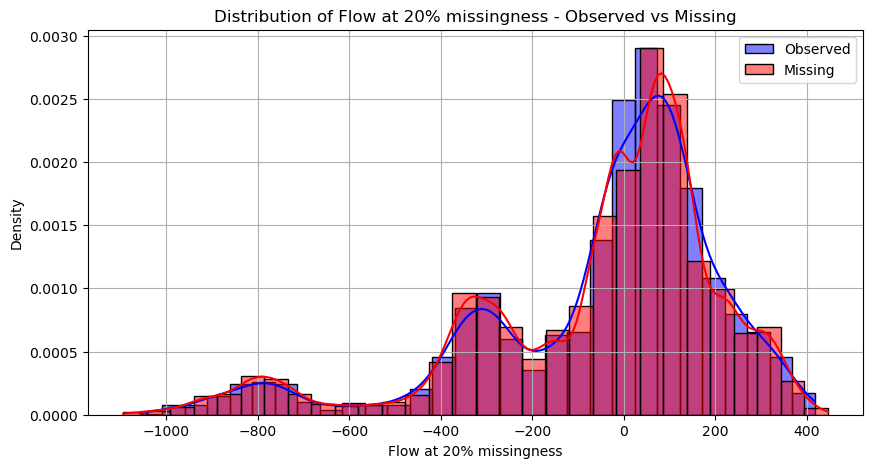

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_missing_vs_observed(data, mask, feature_name="flow"):
    """
    data: 1D array of original values
    mask: 1D boolean array, True if missing
    feature_name: for labeling
    """
    data_missing = data[mask]
    data_observed = data[~mask]

    plt.figure(figsize=(10, 5))
    sns.histplot(data_observed, color='blue', label='Observed', kde=True, stat="density", bins=30)
    sns.histplot(data_missing, color='red', label='Missing', kde=True, stat="density", bins=30)
    plt.title(f"Distribution of {feature_name} - Observed vs Missing")
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_missing_vs_observed(X_val_full_unscaled_seq_tensor[0].flatten(), val_masks_seq[0][90].flatten(), feature_name="Flow at 20% missingness")

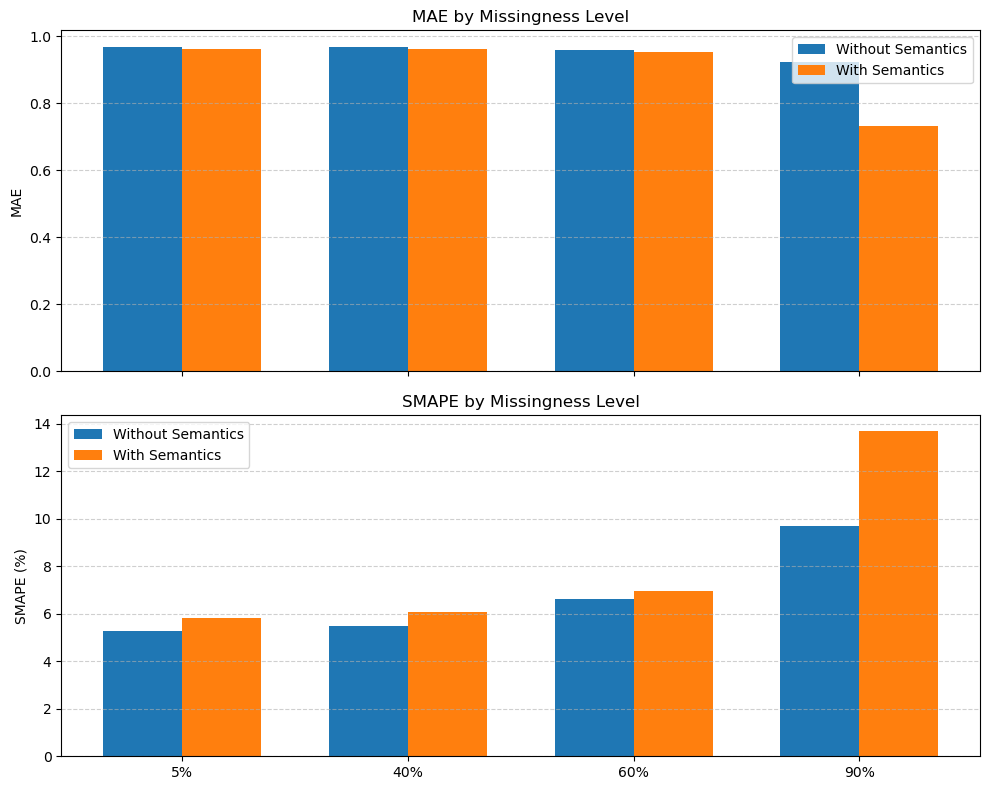

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Missingness levels
missing_levels = ['5%', '40%', '60%', '90%']

# Bar chart setup
x = np.arange(len(missing_levels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- MAE plot ---
ax[0].bar(x - width/2, r2_all.values(), width, label='Without Semantics', color='tab:blue')
ax[0].bar(x + width/2, avg_r2_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE by Missingness Level')
ax[0].legend()
ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# --- SMAPE plot ---
ax[1].bar(x - width/2, smape_all.values(), width, label='Without Semantics', color='tab:blue')
ax[1].bar(x + width/2, avg_smape_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[1].set_ylabel('SMAPE (%)')
ax[1].set_title('SMAPE by Missingness Level')
ax[1].set_xticks(x)
ax[1].set_xticklabels(missing_levels)
ax[1].legend()
ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()
